<a href="https://colab.research.google.com/github/fedebena/ros-bag/blob/main/auvetech_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Install bagpy to read bag files - more on bagpy at https://jmscslgroup.github.io/bagpy/about.html
!pip install bagpy

In [2]:
#Run wget to save files in the current working directory
!wget 'https://open-source-webviz-ui.s3.amazonaws.com/demo.bag'

--2022-04-07 00:47:16--  https://open-source-webviz-ui.s3.amazonaws.com/demo.bag
Resolving open-source-webviz-ui.s3.amazonaws.com (open-source-webviz-ui.s3.amazonaws.com)... 52.218.202.10
Connecting to open-source-webviz-ui.s3.amazonaws.com (open-source-webviz-ui.s3.amazonaws.com)|52.218.202.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 729967395 (696M) [binary/octet-stream]
Saving to: ‘demo.bag.2’

demo.bag.2          100%[===================>] 696.15M  17.2MB/s    in 41s     

2022-04-07 00:47:58 (16.9 MB/s) - ‘demo.bag.2’ saved [729967395/729967395]



In [3]:
#Load libraries
from bagpy import bagreader
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#Initialize bagreader class, then display topics in demo.bag
b = bagreader('demo.bag')
b.topic_table

[INFO]  Data folder demo already exists. Not creating.


,Topics,Types,Message Count,Frequency
0,/diagnostics,diagnostic_msgs/DiagnosticArray,140,10.993696
1,/diagnostics_agg,diagnostic_msgs/DiagnosticArray,40,1.773960
2,/diagnostics_toplevel_state,diagnostic_msgs/DiagnosticStatus,40,1.696236
3,/gps/fix,sensor_msgs/NavSatFix,146,10.006141
4,/gps/rtkfix,nav_msgs/Odometry,200,10.009436
5,/gps/time,sensor_msgs/TimeReference,192,10.008075
6,/image_raw,sensor_msgs/Image,600,30.000458
7,/obs1/gps/fix,sensor_msgs/NavSatFix,30,2.479277
8,/obs1/gps/rtkfix,nav_msgs/Odometry,200,10.009699
9,/obs1/gps/time,sensor_msgs/TimeReference,136,9.857122


In [5]:
#Decode message from /gps/fix topic into gps, then load into pandas dataframe
gps = b.message_by_topic('/gps/fix')
print("File saved: {}".format(gps))
df_gps = pd.read_csv(gps)
df_gps


File saved: demo/gps-fix.csv


,Time,header.seq,header.stamp.secs,header.stamp.nsecs,header.frame_id,status.status,status.service,latitude,longitude,altitude,position_covariance_0,position_covariance_1,position_covariance_2,position_covariance_3,position_covariance_4,position_covariance_5,position_covariance_6,position_covariance_7,position_covariance_8,position_covariance_type
0,1.490150e+09,24204,1490150278,93991776,gps,0,1,37.400859,-122.107818,-5.918644,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
1,1.490150e+09,24205,1490150278,169880552,gps,0,1,37.400859,-122.107818,-5.910979,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
2,1.490150e+09,24206,1490150278,370700922,gps,0,1,37.400859,-122.107818,-5.911205,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
3,1.490150e+09,24207,1490150278,469676867,gps,0,1,37.400859,-122.107818,-5.914801,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
4,1.490150e+09,24208,1490150278,570582236,gps,0,1,37.400859,-122.107818,-5.910734,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,1.490150e+09,24345,1490150297,368564658,gps,0,1,37.400701,-122.108208,-6.245499,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
142,1.490150e+09,24346,1490150297,481478402,gps,0,1,37.400698,-122.108210,-6.241157,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
143,1.490150e+09,24347,1490150297,569403847,gps,0,1,37.400696,-122.108212,-6.235945,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0
144,1.490150e+09,24348,1490150297,668843895,gps,0,1,37.400694,-122.108214,-6.227944,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0


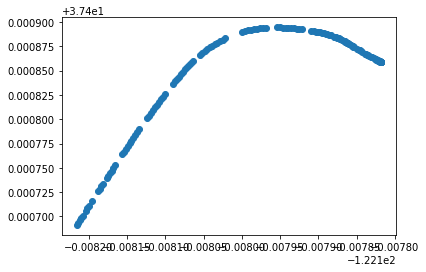

In [6]:
#Plot latitude and longitude 
plt.scatter(x=df_gps['longitude'], y=df_gps['latitude'])
plt.show()

